# Mobile Price Prediction
Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("./train.csv")
print("Train dataset shape {}".format(df.shape))
df.sample(10)

Train dataset shape (2000, 21)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1251,1317,0,1.8,1,2,0,43,0.5,113,5,...,179,613,3436,16,13,5,0,1,1,3
373,1067,1,1.7,1,0,0,58,0.5,135,7,...,79,681,706,12,9,16,0,1,0,0
301,977,1,1.1,1,2,0,57,0.6,181,6,...,63,566,1206,7,1,8,0,1,1,0
1851,1077,1,2.5,0,13,1,49,0.6,131,4,...,334,1079,3454,17,11,2,1,0,1,3
828,1965,0,0.5,0,6,1,4,1.0,84,7,...,977,1660,3535,17,0,16,1,1,1,3
439,1469,0,2.1,0,0,0,8,0.7,123,7,...,398,1133,1052,8,1,3,0,1,0,0
1489,772,1,1.2,1,7,1,8,0.6,134,7,...,552,1802,422,7,6,15,1,0,0,0
1617,634,1,0.8,0,5,0,41,0.2,192,1,...,1362,1853,3242,18,11,4,1,0,1,3
543,1590,0,1.9,1,3,1,21,1.0,160,5,...,920,963,1701,11,4,4,1,0,1,1
584,946,1,2.6,1,17,0,5,0.1,166,3,...,1698,1771,3720,15,7,4,0,1,0,3


In [5]:
columns = df.columns.to_list()
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
[[x,len(df[x].value_counts())] for x in columns]

[['battery_power', 1094],
 ['blue', 2],
 ['clock_speed', 26],
 ['dual_sim', 2],
 ['fc', 20],
 ['four_g', 2],
 ['int_memory', 63],
 ['m_dep', 10],
 ['mobile_wt', 121],
 ['n_cores', 8],
 ['pc', 21],
 ['px_height', 1137],
 ['px_width', 1109],
 ['ram', 1562],
 ['sc_h', 15],
 ['sc_w', 19],
 ['talk_time', 19],
 ['three_g', 2],
 ['touch_screen', 2],
 ['wifi', 2],
 ['price_range', 4]]

In [8]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [9]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Target column => price_range

<Axes: >

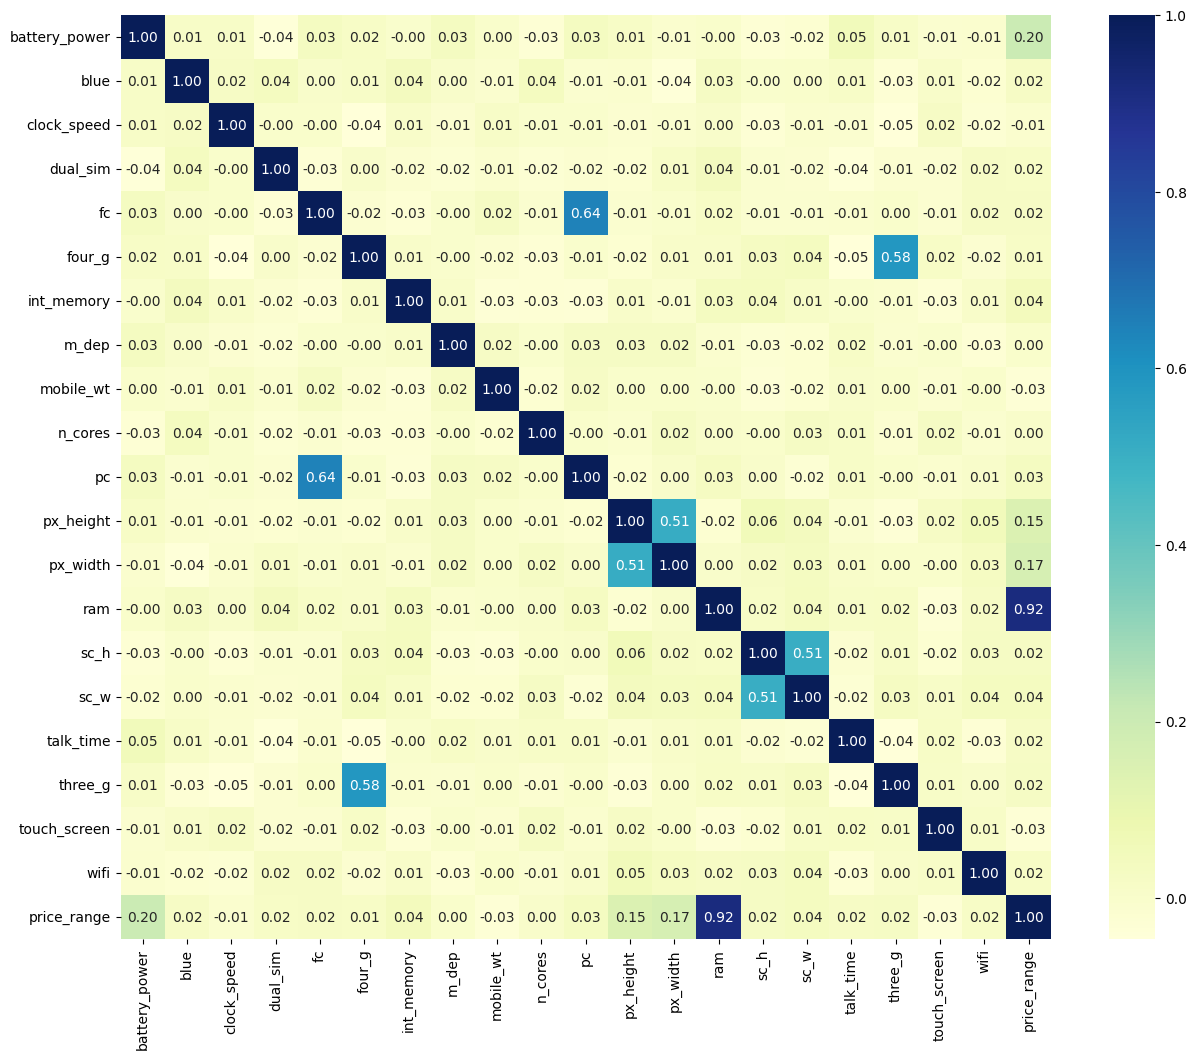

In [10]:
fig, ax = plt.subplots(1,1,sharex=True, figsize=(15,12))
sns.heatmap(df.corr(), fmt='.2f', cmap="YlGnBu", annot=True)

Observations: \
These factors most influence the price range of mobile
1) battery_power
2) px_height
3) px_width
4) ram

In [11]:
b_cols = ['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi']

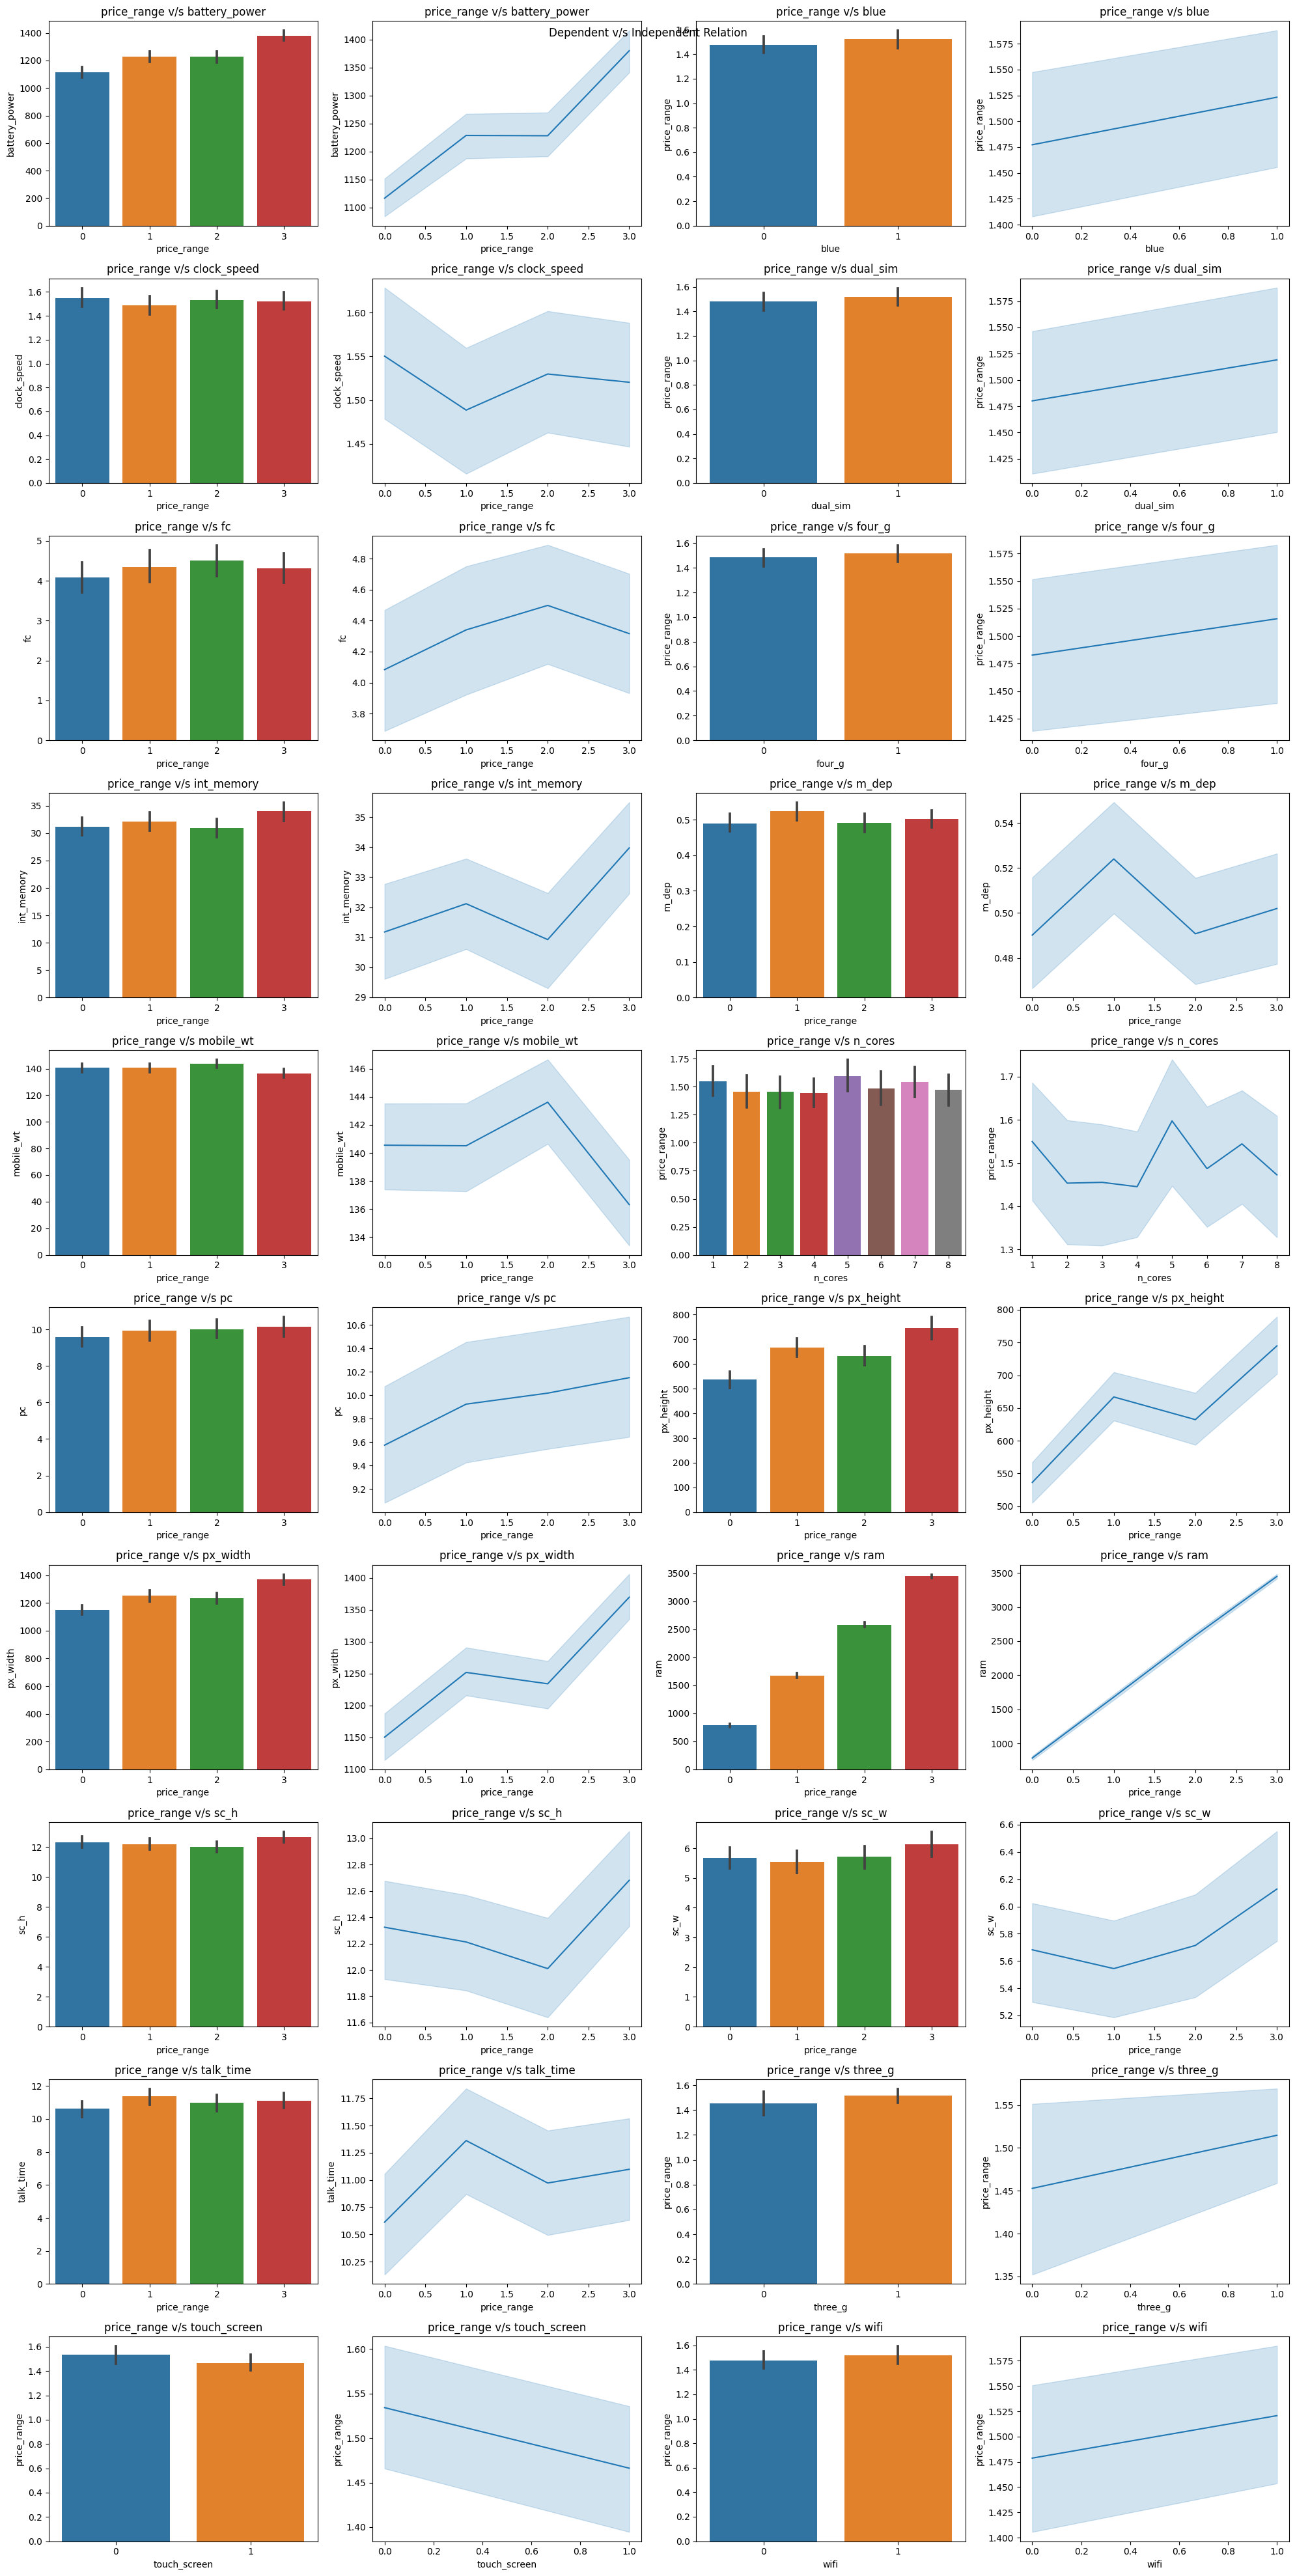

In [12]:
fig, axes = plt.subplots(10,4,figsize=(20,40))
fig.suptitle("Dependent v/s Independent Relation")
for i in range (len(columns)-1):
    posx = i // 2
    posy = i % 2 * 2
    axes[posx,posy].set_title(columns[20] + " v/s " + columns[i])
    axes[posx,posy+1].set_title(columns[20] + " v/s " + columns[i])
    if columns[i] not in b_cols:
        sns.barplot(data=df, x=columns[20], y=columns[i], ax=axes[posx,posy])
        sns.lineplot(data=df, x=columns[20], y=columns[i], ax=axes[posx,posy+1])
    else:
        sns.barplot(data=df, x=columns[i], y=columns[20], ax=axes[posx,posy])
        sns.lineplot(data=df, x=columns[i], y=columns[20], ax=axes[posx,posy+1])
plt.tight_layout()
plt.show()

# Observations:
- Battery Power
    - Price increase with increase in battery power 
- Bluetooth
    - Price increases with Bluetooth  
- Dual Sim
    - Price increases with Dual sim  
- 4G
    - Price increases with 4G 
- Primary Camera
    - Price increases with increase in pixels of primary camera

In [13]:
for c in b_cols:
    df[c] = df[c].astype('category')
df['price_range'] = df['price_range'].astype('category')

In [14]:
X = df.drop('price_range', axis=1)
y = df['price_range']

In [15]:
X.sample(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1993,1467,1,0.5,0,0,0,18,0.6,122,5,0,888,1099,3962,15,11,5,1,1,1
1148,727,1,1.5,0,0,1,32,1.0,131,7,1,813,1377,1891,19,13,7,1,0,1
1608,1129,1,0.8,1,9,1,21,0.6,116,2,10,1128,1702,1400,11,0,13,1,1,0
326,1144,1,1.5,1,0,0,21,0.4,189,1,11,159,724,3252,16,0,8,0,0,0
1448,1392,0,2.5,0,0,1,44,0.7,113,4,2,482,1098,1280,8,1,16,1,0,1
131,1790,0,2.5,1,9,0,2,0.1,184,1,14,622,792,1366,7,0,20,1,1,1
110,783,0,1.8,1,0,1,43,1.0,106,3,4,1198,1471,2016,16,4,18,1,1,0
752,1620,0,2.6,1,6,0,5,0.9,186,6,18,434,1339,1086,18,14,13,1,0,0
409,1726,1,0.9,1,2,0,51,0.6,193,4,3,379,1223,2239,13,9,13,1,0,1
464,1067,1,2.4,1,3,1,40,0.6,122,8,15,494,1989,604,16,14,11,1,0,0


In [16]:
y.sample(10)

1545    2
797     0
1595    2
1516    1
686     2
963     1
1926    1
1789    1
1265    3
1571    3
Name: price_range, dtype: category
Categories (4, int64): [0, 1, 2, 3]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (1600, 20)
X_test shape: (400, 20)
y_train shape: (1600,)
y_test shape: (400,)


In [19]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy Score: {}".format(round(accuracy_score(y_test, y_pred)*100, 2)))
print("Classification Report: \n{}".format(classification_report(y_test, y_pred)))
print("Confusion Matrix: \n{}".format(confusion_matrix(y_test, y_pred)))

Accuracy Score: 97.75
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        95
           1       0.98      0.97      0.97        92
           2       0.94      0.98      0.96        99
           3       0.99      0.97      0.98       114

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400

Confusion Matrix: 
[[ 94   1   0   0]
 [  0  89   3   0]
 [  0   1  97   1]
 [  0   0   3 111]]


In [20]:
import joblib
joblib.dump(model, 'mobile_model.pkl') 

['mobile_model.pkl']